# Instalacja biblioteki quandl

In [ ]:
pip install quandl

# Import bibliotek

In [24]:
import quandl 
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings("ignore")
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.arima.model import ARIMA
from pandas.plotting import scatter_matrix
from math import sqrt
from sklearn.metrics import mean_squared_error


# Wczytywanie danych za pomocą API Quandl

**Apple**

In [2]:
aapl = quandl.get("WIKI/AAPL", start_date="2006-10-01", end_date="2012-01-01")
aapl.head()

,Open,High,Low,Close,Volume,Ex-Dividend,Split Ratio,Adj. Open,Adj. High,Adj. Low,Adj. Close,Adj. Volume
Date,,,,,,,,,,,,
2006-10-02,75.10,75.870,74.30,74.86,25451400.0,0.0,1.0,9.651397,9.750352,9.548586,9.620553,178159800.0
2006-10-03,74.45,74.950,73.19,74.07,28239600.0,0.0,1.0,9.567863,9.632120,9.405935,9.519027,197677200.0
2006-10-04,74.10,75.462,73.16,75.38,29610100.0,0.0,1.0,9.522883,9.697919,9.402080,9.687381,207270700.0
2006-10-05,74.53,76.160,74.13,74.83,24424400.0,0.0,1.0,9.578144,9.787621,9.526738,9.616698,170970800.0
2006-10-06,74.42,75.040,73.81,74.22,16677100.0,0.0,1.0,9.564007,9.643686,9.485614,9.538304,116739700.0


**Tesla**

In [3]:
tsla = quandl.get("WIKI/TSLA", start_date="2006-10-01", end_date="2012-01-01")
tsla.head()

,Open,High,Low,Close,Volume,Ex-Dividend,Split Ratio,Adj. Open,Adj. High,Adj. Low,Adj. Close,Adj. Volume
Date,,,,,,,,,,,,
2010-06-29,19.00,25.0000,17.54,23.89,18766300.0,0.0,1.0,19.00,25.0000,17.54,23.89,18766300.0
2010-06-30,25.79,30.4192,23.30,23.83,17187100.0,0.0,1.0,25.79,30.4192,23.30,23.83,17187100.0
2010-07-01,25.00,25.9200,20.27,21.96,8218800.0,0.0,1.0,25.00,25.9200,20.27,21.96,8218800.0
2010-07-02,23.00,23.1000,18.71,19.20,5139800.0,0.0,1.0,23.00,23.1000,18.71,19.20,5139800.0
2010-07-06,20.00,20.0000,15.83,16.11,6866900.0,0.0,1.0,20.00,20.0000,15.83,16.11,6866900.0


**Microsoft**

In [4]:
msft = quandl.get("WIKI/MSFT", start_date="2006-10-01", end_date="2012-01-01")
msft.head()

,Open,High,Low,Close,Volume,Ex-Dividend,Split Ratio,Adj. Open,Adj. High,Adj. Low,Adj. Close,Adj. Volume
Date,,,,,,,,,,,,
2006-10-02,27.32,27.4900,27.15,27.36,52908100.0,0.0,1.0,20.944304,21.074631,20.813977,20.974969,52908100.0
2006-10-03,27.37,27.4800,27.21,27.37,39386200.0,0.0,1.0,20.982636,21.066965,20.859975,20.982636,39386200.0
2006-10-04,27.39,27.9600,27.37,27.94,82191200.0,0.0,1.0,20.997968,21.434947,20.982636,21.419614,82191200.0
2006-10-05,27.92,28.1100,27.78,27.92,81967200.0,0.0,1.0,21.404282,21.549941,21.296954,21.404282,81967200.0
2006-10-06,27.76,28.0002,27.65,27.87,36452200.0,0.0,1.0,21.281621,21.465765,21.197292,21.365950,36452200.0


# Przygotowanie danych

**Liczba wierszy i kolumn**

In [5]:
aapl.shape, tsla.shape, msft.shape

((1323, 12), (382, 12), (1323, 12))

Ze względu na to, że są tylko 382 wiersze dla Tesli, w dalszej części zajmę się tylko akcjami Apple i Miscrosoftu.

**Sprawdzenie czy są brakujące dane**

In [6]:
aapl.isna().sum().sum(), msft.isna().sum().sum()

(0, 0)

**Statystyki opisowe**

In [7]:
aapl['Close'].describe()

count    1323.000000
mean      202.224393
std        98.837774
min        73.230000
25%       122.020000
50%       175.840000
75%       270.900000
max       422.240000
Name: Close, dtype: float64

In [8]:
msft['Close'].describe()

count    1323.000000
mean       26.746223
std         3.763366
min        15.150000
25%        24.905000
50%        27.180000
75%        29.220000
max        37.060000
Name: Close, dtype: float64

# Wizualizacje

**Cena na koniec dnia**

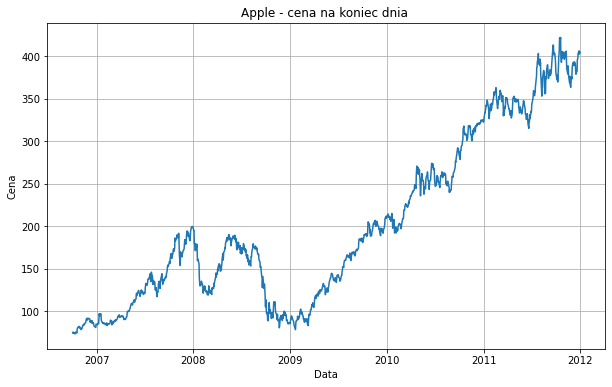

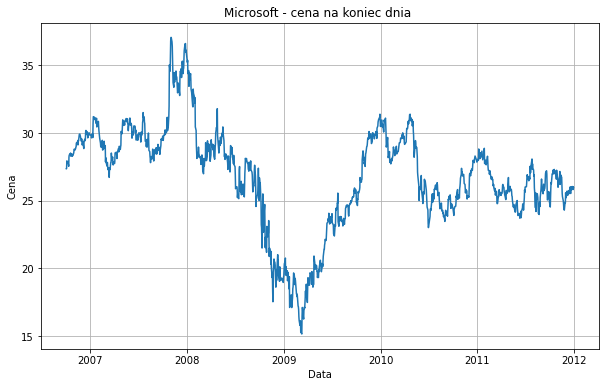

In [9]:
def plot_close_price(data,company, interval=""):
    plt.figure(figsize=(10,6))
    plt.grid(True)
    plt.xlabel('Data')
    plt.ylabel('Cena')
    plt.plot(data['Close'])
    plt.title(f'{company} - cena na koniec dnia {interval}')
    plt.show()
plot_close_price(aapl,'Apple')
plot_close_price(msft,'Microsoft')


**Wizualizacja ceny dla różnych okresów czasu**

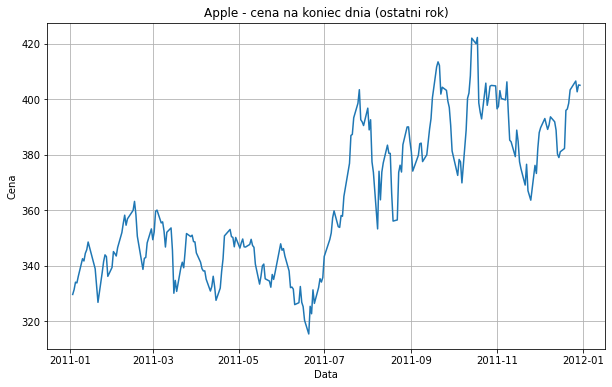

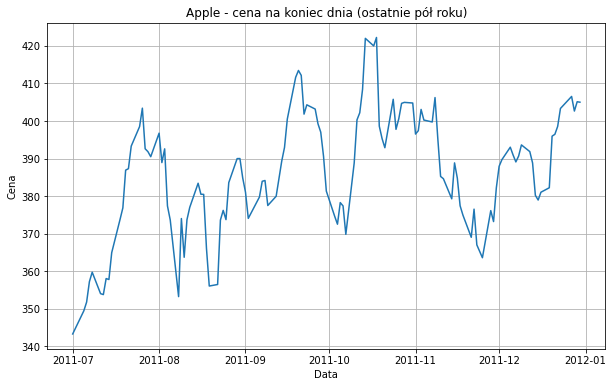

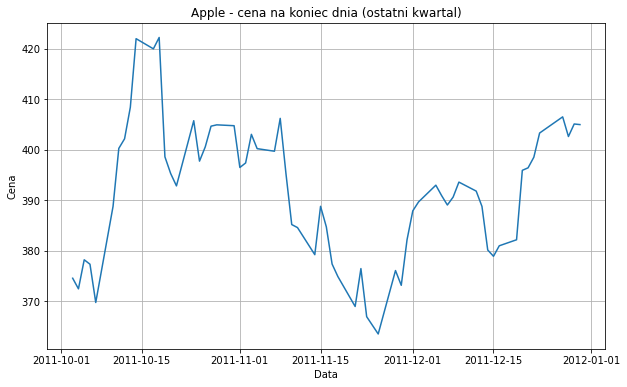

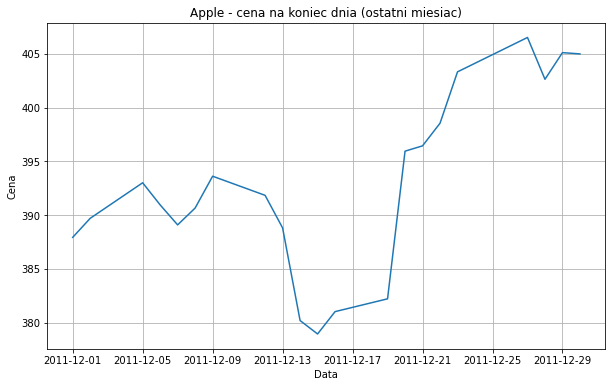

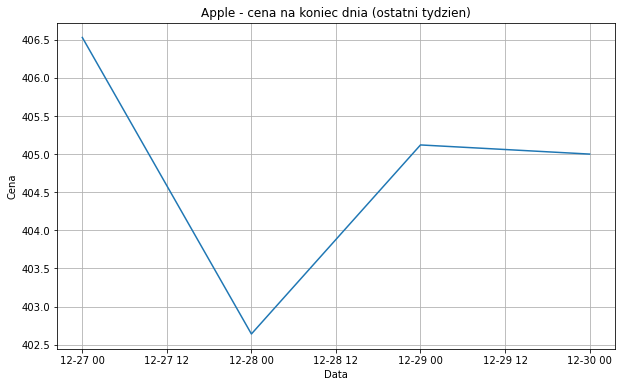

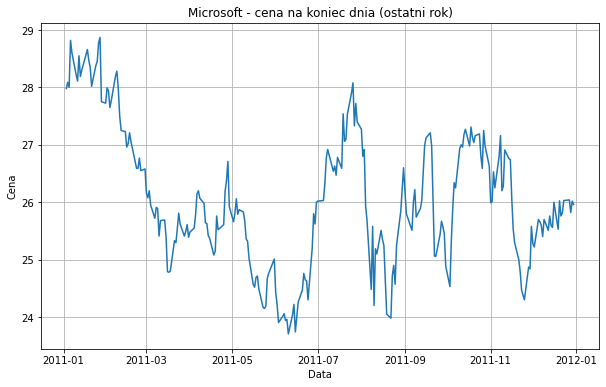

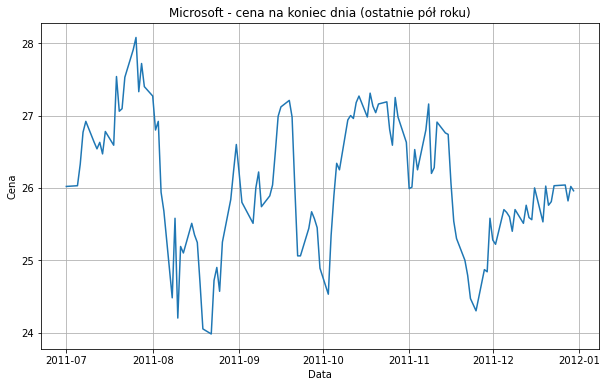

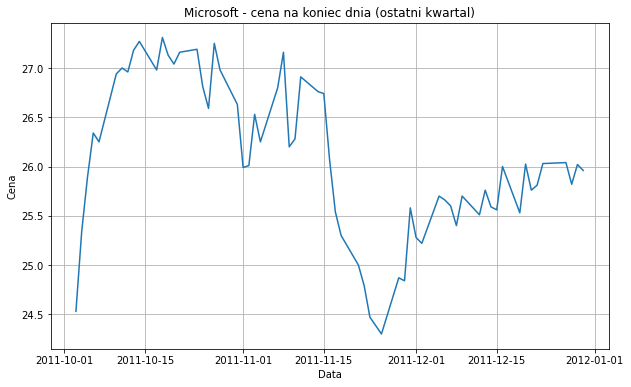

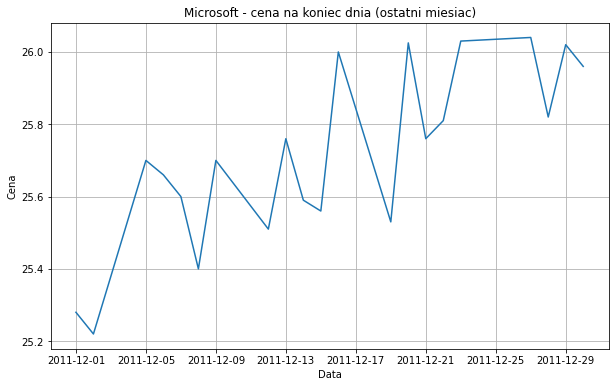

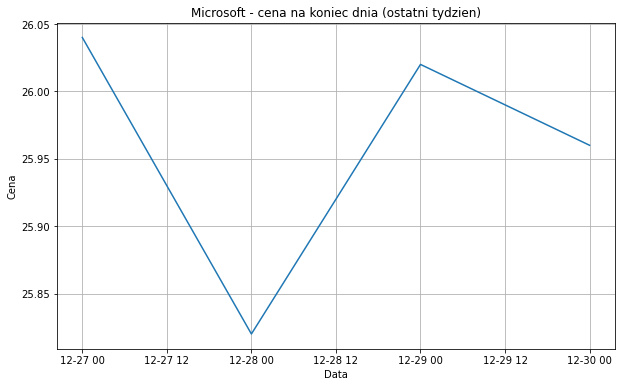

In [10]:

def plot_last_intervals(data,company):
    plot_close_price(data.loc[pd.Timestamp('2011-01-01'):pd.Timestamp('2011-12-31')],company, '(ostatni rok)')
    plot_close_price(data.loc[pd.Timestamp('2011-07-01'):pd.Timestamp('2011-12-31')],company, '(ostatnie pół roku)')
    plot_close_price(data.loc[pd.Timestamp('2011-10-01'):pd.Timestamp('2011-12-31')],company, '(ostatni kwartal)') 
    plot_close_price(data.loc[pd.Timestamp('2011-12-01'):pd.Timestamp('2011-12-31')],company, '(ostatni miesiac)')
    plot_close_price(data.loc[pd.Timestamp('2011-12-25'):pd.Timestamp('2011-12-31')],company, '(ostatni tydzien)')
    
plot_last_intervals(aapl,"Apple")
plot_last_intervals(msft,'Microsoft')

**Dzienna zmiana procentowa**

In [11]:
def create_titles(company, okres):
    text1 = ""
    text2 = ""
    if okres == 'D':
        text1 = "dzienna"
        text2 = 'dziennej'
    elif okres == 'M':
        text1 = 'miesięczna'
        text2 = 'miesięcznej'
    return f'{company} - {text1} zmiana procentowa', f'{company} - histogram {text2} zmiany procentowej'
def plot_pct_change(data,company, okres):
    data = data.copy().resample(okres).mean()
    title1, title2 = create_titles(company, okres)
    plt.figure(figsize=(10,6))
    plt.grid(True)
    plt.xlabel('Data')
    plt.ylabel('Zmiana procentowa')
    pct_change = data['Close'].pct_change() * 100
    pct_change = pct_change.fillna(0)
    plt.plot(pct_change)
    plt.title(title1)
    plt.show()
    pct_change.hist(bins=20)
    plt.title(title2)
    plt.show()


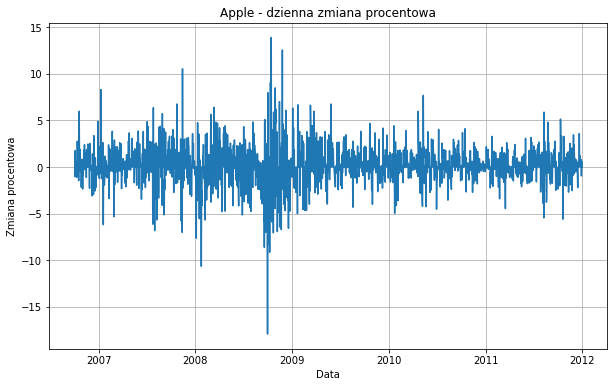

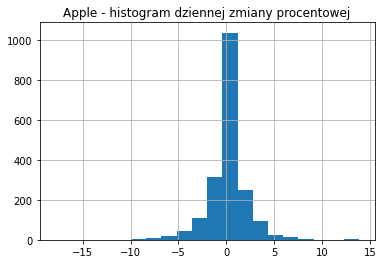

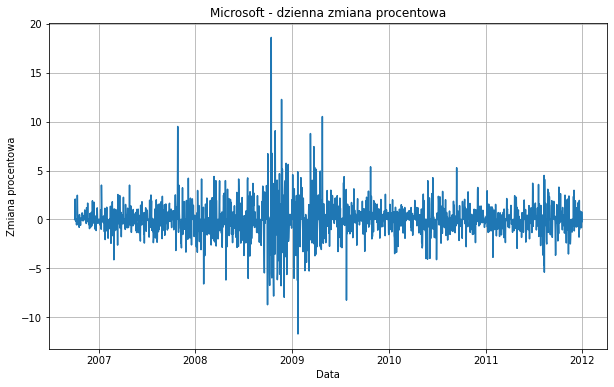

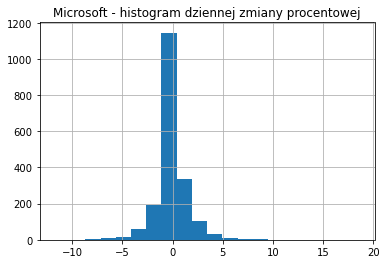

In [12]:
plot_pct_change(aapl,'Apple', 'D')
plot_pct_change(msft,'Microsoft', 'D')

**Miesięczna zmiana procentowa**

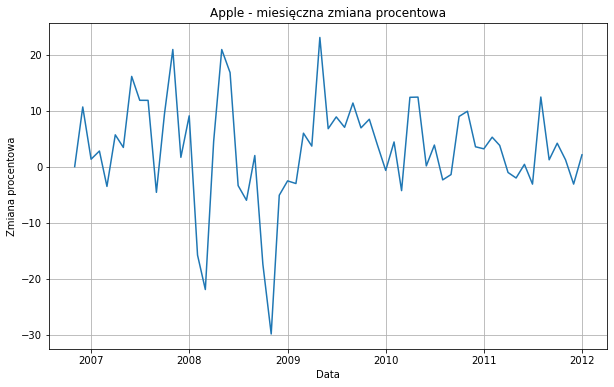

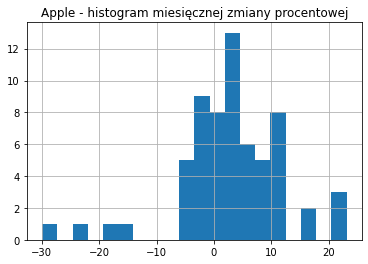

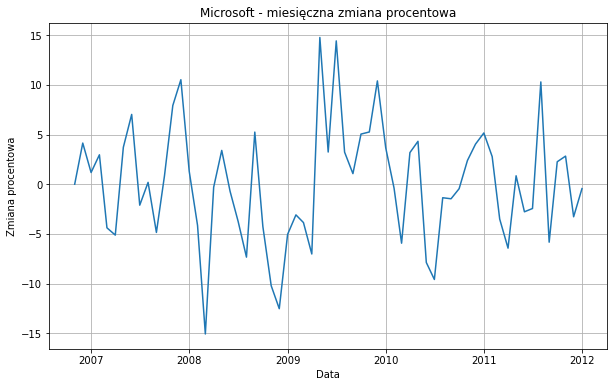

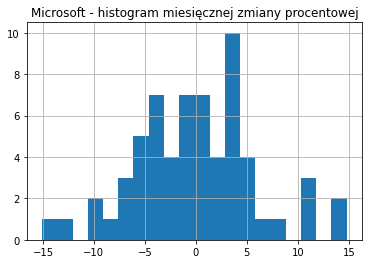

In [13]:
plot_pct_change(aapl,'Apple', 'M')
plot_pct_change(msft,'Microsoft', 'M')

**Połączenie danych z Apple i Miscrosoft**

In [14]:
aapl['company']='aapl'
msft['company']='msft'
all_data = pd.concat([aapl, msft], keys=['aapl', 'msft'], names=['company', 'Date'])
print(all_data)

                       Open    High    Low  Close      Volume  Ex-Dividend  \
company Date                                                                 
aapl    2006-10-02  75.1000  75.870  74.30  74.86  25451400.0          0.0   
        2006-10-03  74.4500  74.950  73.19  74.07  28239600.0          0.0   
        2006-10-04  74.1000  75.462  73.16  75.38  29610100.0          0.0   
        2006-10-05  74.5300  76.160  74.13  74.83  24424400.0          0.0   
        2006-10-06  74.4200  75.040  73.81  74.22  16677100.0          0.0   
...                     ...     ...    ...    ...         ...          ...   
msft    2011-12-23  25.9101  26.040  25.73  26.03  23205800.0          0.0   
        2011-12-27  25.9600  26.140  25.93  26.04  21287200.0          0.0   
        2011-12-28  26.1100  26.150  25.76  25.82  29822500.0          0.0   
        2011-12-29  25.9500  26.050  25.86  26.02  22616900.0          0.0   
        2011-12-30  26.0000  26.120  25.91  25.96  27395700.0   

**Zależność między dziennymi zmianami kursów akcji Appla i Microsoftu**

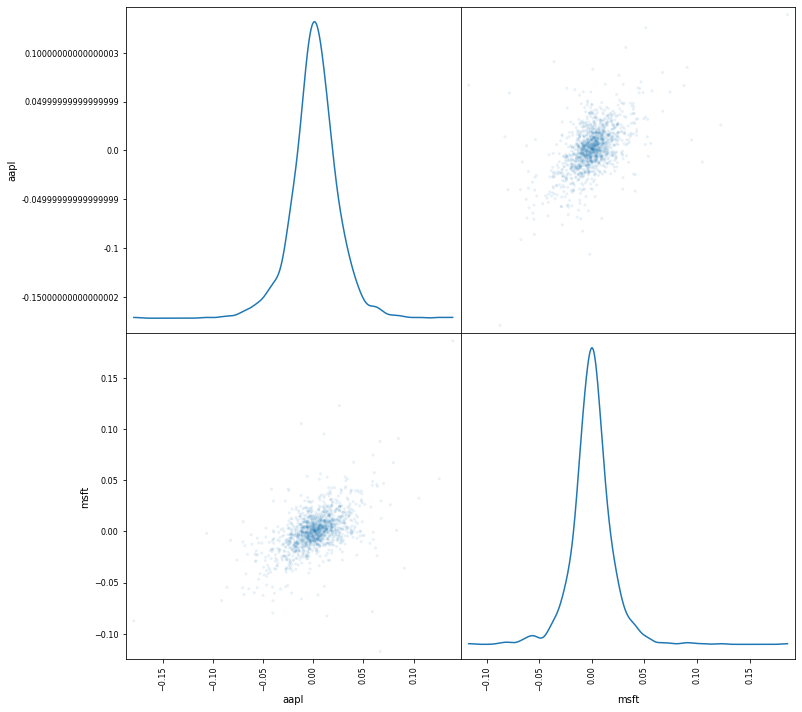

In [15]:
daily_close = all_data[['Close']].reset_index().pivot('Date', 'company', 'Close')
daily_pct_change = daily_close.pct_change()

scatter_matrix(daily_pct_change, diagonal='kde', alpha=0.1,figsize=(12,12))
plt.show()

# Hipoteza o stacjonarności

H0 (hipoteza zerowa): Dane nie są stacjonarne.

H1: (hipoteza alternatywna): Dane są stacjonarne.

In [16]:

def adfuller_test(data):
    result= adfuller(data)
    labels = ['ADF Test Statistic','p-value','#Lags Used','Number of Observations']
    for value,label in zip(result,labels):
        print(label+' : '+str(value) )
    if result[1] <= 0.05:
        print("Dane stacjonarne")
    else:
        print("Dane niestacjonarne")
adfuller_test(aapl['Close'])
adfuller_test(msft['Close'])

ADF Test Statistic : 0.01909856680592665
p-value : 0.9600833124122682
#Lags Used : 0
Number of Observations : 1322
Dane niestacjonarne
ADF Test Statistic : -2.1549683119135494
p-value : 0.22299318949612823
#Lags Used : 23
Number of Observations : 1299
Dane niestacjonarne


Dane nie są stacjonarne

# Dekompozycja na trend i sezonowość

<Figure size 432x288 with 0 Axes>

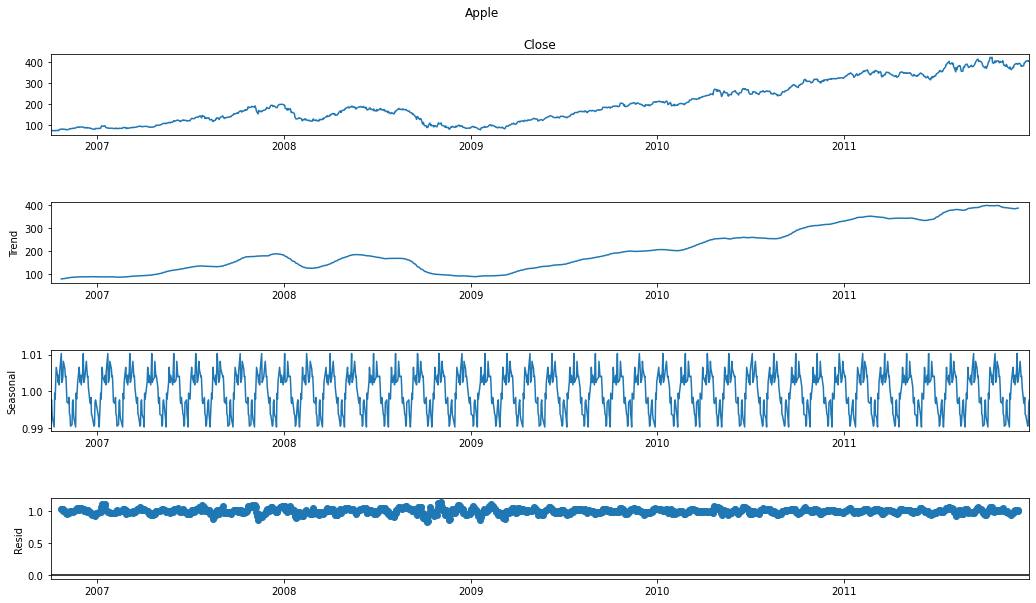

<Figure size 432x288 with 0 Axes>

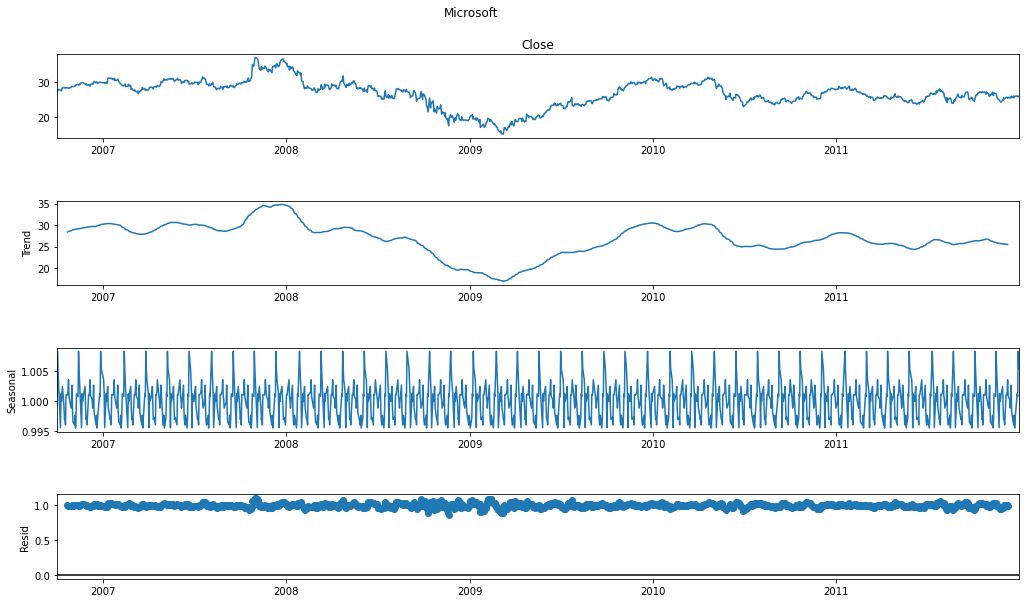

In [17]:
def plot_decompose(data, company):
    result = seasonal_decompose(data, model='multiplicative', period = 30)
    fig = plt.figure()
    fig = result.plot()  
    fig.set_size_inches(16, 9)
    fig.suptitle(company)
plot_decompose(aapl['Close'], 'Apple')
plot_decompose(msft['Close'], 'Microsoft')

# Transformacja danych

In [18]:
df_log_aapl = np.log(aapl['Close'])
df_log_msft = np.log(msft['Close'])

# Podział danych na treningowe i testowe

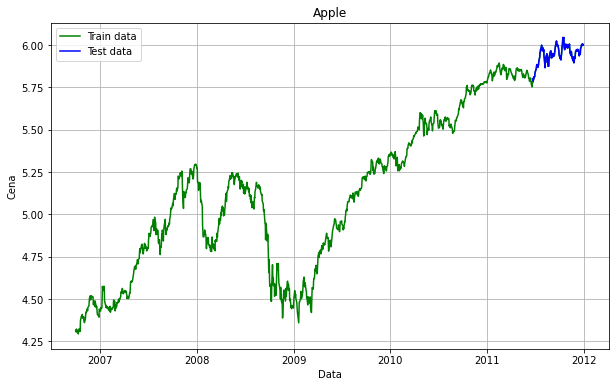

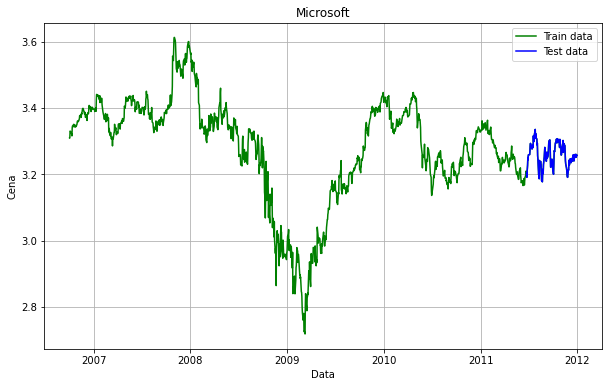

In [19]:
def plot_split_data(df_log, company):  
    train_data, test_data = df_log[3:int(len(df_log)*0.9)], df_log[int(len(df_log)*0.9):]
    plt.figure(figsize=(10,6))
    plt.grid(True)
    plt.xlabel('Data')
    plt.ylabel('Cena')
    plt.plot(df_log, 'green', label='Train data')
    plt.plot(test_data, 'blue', label='Test data')
    plt.legend()
    plt.title(company)
    return train_data, test_data
train_aapl, test_aapl = plot_split_data(df_log_aapl, 'Apple')
train_msft, test_msft = plot_split_data(df_log_msft, 'Microsoft')

# Optymalizacja hiperparametrów

In [20]:
def evaluate_arima_model(X, arima_order):
    train_size = int(len(X) * 0.66)
    train, test = X[0:train_size], X[train_size:]
    history = [x for x in train]
    predictions = list()
    for t in range(len(test)):
        model = ARIMA(history, order=arima_order)
        model_fit = model.fit()
        yhat = model_fit.forecast()[0]
        predictions.append(yhat)
        history.append(test[t])
    rmse = sqrt(mean_squared_error(test, predictions))
    return rmse


def evaluate_models(dataset, p_values, d_values, q_values):
    dataset = dataset.astype('float32')
    best_score, best_cfg = float("inf"), None
    for p in p_values:
        for d in d_values:
             for q in q_values:
                order = (p,d,q)
                try:
                    rmse = evaluate_arima_model(dataset, order)
                    if rmse < best_score:
                        best_score, best_cfg = rmse, order
                    print('ARIMA%s RMSE=%.3f' % (order,rmse))
                except:
                    continue
    print('Best ARIMA%s RMSE=%.3f' % (best_cfg, best_score))

In [26]:
p_values = [0, 4, 6, 10]
d_values = range(0, 3)
q_values = range(0, 3)
evaluate_models(train_aapl, p_values, d_values, q_values)

ARIMA(0, 0, 0) RMSE=0.655
ARIMA(0, 0, 1) RMSE=0.338
ARIMA(0, 0, 2) RMSE=0.197
ARIMA(0, 1, 0) RMSE=0.016
ARIMA(0, 1, 1) RMSE=0.016
ARIMA(0, 1, 2) RMSE=0.016
ARIMA(0, 2, 0) RMSE=0.022
ARIMA(0, 2, 1) RMSE=0.016
ARIMA(0, 2, 2) RMSE=0.016
ARIMA(4, 0, 0) RMSE=0.016
ARIMA(4, 0, 1) RMSE=0.016
ARIMA(4, 0, 2) RMSE=0.016
ARIMA(4, 1, 0) RMSE=0.016
ARIMA(4, 1, 1) RMSE=0.016
ARIMA(4, 1, 2) RMSE=0.016
ARIMA(4, 2, 0) RMSE=0.018
ARIMA(4, 2, 1) RMSE=0.016
ARIMA(4, 2, 2) RMSE=0.016
ARIMA(6, 0, 0) RMSE=0.016
ARIMA(6, 0, 1) RMSE=0.016
ARIMA(6, 0, 2) RMSE=0.016
ARIMA(6, 1, 0) RMSE=0.016
ARIMA(6, 1, 1) RMSE=0.016
ARIMA(6, 1, 2) RMSE=0.016
ARIMA(6, 2, 0) RMSE=0.017
ARIMA(6, 2, 1) RMSE=0.016
ARIMA(6, 2, 2) RMSE=0.016
ARIMA(10, 0, 0) RMSE=0.016
ARIMA(10, 0, 1) RMSE=0.016
ARIMA(10, 0, 2) RMSE=0.016
ARIMA(10, 1, 0) RMSE=0.016
ARIMA(10, 1, 1) RMSE=0.016
ARIMA(10, 1, 2) RMSE=0.016
ARIMA(10, 2, 0) RMSE=0.017
ARIMA(10, 2, 1) RMSE=0.016
ARIMA(10, 2, 2) RMSE=0.016
Best ARIMA(0, 2, 1) RMSE=0.016


**Najlepszy model to ARIMA (0,2,1). Średni błąd na danych walidacyjnych około 0.016**

# Stworzenie najlepszego modelu (0,2,1) dla kursów Apple

In [28]:
model_aapl = ARIMA(train_aapl, order=(0, 2, 1))  
fitted_aapl = model_aapl.fit()  
print(fitted_aapl.summary())

                               SARIMAX Results                                
Dep. Variable:                  Close   No. Observations:                 1187
Model:                 ARIMA(0, 2, 1)   Log Likelihood                2705.156
Date:                Tue, 14 Feb 2023   AIC                          -5406.312
Time:                        17:39:13   BIC                          -5396.157
Sample:                             0   HQIC                         -5402.484
                               - 1187                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -1.0000      0.505     -1.980      0.048      -1.990      -0.010
sigma2         0.0006      0.000      1.990      0.047    9.05e-06       0.001
Ljung-Box (L1) (Q):                   0.07   Jarque-

# Ewaluacja modelu na danych testowych

In [43]:
def predict_and_eval(train, test):
    history = [x for x in train]
    predictions = list()
    for t in range(len(test)):
        model = ARIMA(history, order=(0,2,1))
        model_fit = model.fit()
        yhat = model_fit.forecast()[0]
        predictions.append(yhat)
        history.append(test[t])
    rmse = sqrt(mean_squared_error(test, predictions))
    return rmse, predictions

score, preds = predict_and_eval(train_aapl, test_aapl)
print(score)
print(np.exp(score))

0.018740485483779264
1.0189171905017702


Średni **błąd na danych testowych** to około **0.1874.**

Średni **błąd prognozy** to około **1,89%.**

# Predykcja

In [45]:
len(train_aapl), len(test_aapl)

(1187, 133)

<AxesSubplot:xlabel='Date'>

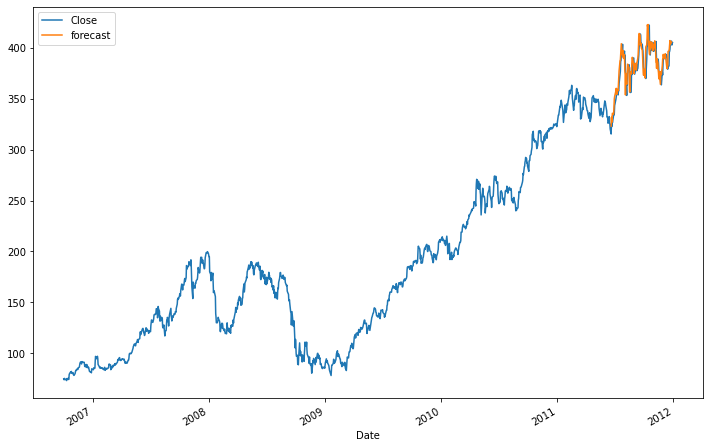

In [44]:
aapl.loc[1187:1320,'forecast'] = np.exp(preds)
aapl[['Close','forecast']].plot(figsize=(12,8))